In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hald = pd.read_csv('hald.csv')

In [3]:
ingredients_list = ['X1','X2','X3','X4']
ingredients = hald[ingredients_list]

In [4]:
pca = PCA()
pca.fit_transform(ingredients)
coeff = pca.components_
print(pd.DataFrame(coeff, index = ingredients_list)) #coefficients

           0         1         2         3
X1 -0.067800 -0.678516  0.029021  0.730874
X2  0.646018  0.019993 -0.755310  0.108480
X3  0.567315 -0.543969  0.403553 -0.468398
X4 -0.506180 -0.493268 -0.515567 -0.484416


In [5]:
cov_matrix = np.cov(coeff)
print(pd.DataFrame(cov_matrix, index = ingredients_list )) #covariance of coeff

           0         1         2         3
X1  0.333318 -0.000022  0.000047  0.002262
X2 -0.000022  0.333303  0.000066  0.003196
X3  0.000047  0.000066  0.333190 -0.006914
X4  0.002262  0.003196 -0.006914  0.000190


In [6]:
#eigenvectors
score = pca.transform(ingredients)
print(pd.DataFrame(score))

            0          1         2         3
0   36.821826   6.870878 -4.590944 -0.396653
1   29.607273  -4.610882 -2.247578  0.395844
2  -12.981776   4.204913  0.902243  1.126101
3   23.714726   6.634053  1.854742  0.378565
4   -0.553192   4.461732 -6.087413 -0.142385
5  -10.812491   3.646571  0.912971  0.134969
6  -32.588167  -8.979846 -1.606266 -0.081764
7   22.606395 -10.725906  3.236538 -0.324335
8   -9.262587  -8.985373 -0.016910  0.543746
9   -3.283969  14.157277  7.046513 -0.340510
10   9.220031 -12.386081  3.428343 -0.435153
11 -25.584909   2.781693 -0.386716 -0.446818
12 -26.903162   2.930971 -2.445523 -0.411607


In [7]:
#eigenvalues
latent = pca.explained_variance_
print(pd.DataFrame(latent))

            0
0  517.796878
1   67.496436
2   12.405430
3    0.237153


In [8]:
#explained
explained = pca.explained_variance_ratio_
print(pd.DataFrame(explained))

          0
0  0.865974
1  0.112882
2  0.020747
3  0.000397


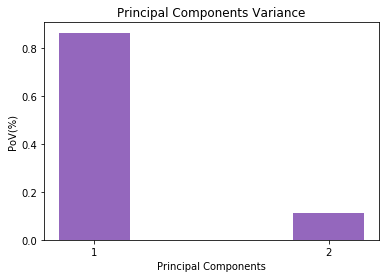

In [9]:
reducedDim = 2
y = explained[:reducedDim]
x = ['1','2']
plt.bar(x, y, width = 0.3, color = 'C4')
plt.xlabel('Principal Components')
plt.ylabel('PoV(%)')
plt.title('Principal Components Variance')
plt.show()